In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


import psycopg2
from sqlalchemy import create_engine, text
from sqlalchemy.types import String, Numeric, Integer, Float, Date, DateTime

In [3]:
df_cust = pd.read_csv("raw_data/customer_data.csv")
df_fx = pd.read_csv("raw_data/fx_gbp.csv", encoding='ISO-8859-1', skiprows=3)
df_trans = pd.read_csv("raw_data/transaction_data.csv")

#### Load and Inspect Data

In [4]:
df_cust.head()

,buyer_id,gender,membership_length,age_group
0,505,F,0.2,50-60
1,1989,F,0.8,60+
2,2234,F,0.4,50-60
3,2619,F,0.4,50-60
4,3392,F,2.3,50-60


In [5]:
df_fx.head()

,currency,rate,Unnamed: 2
0,THB,37.386304,NaN
1,BIF,2242.924895,NaN
2,NGN,439.534518,NaN
3,LKR,214.801634,NaN
4,CHF,1.194301,NaN


In [6]:
df_trans.head()

,purchase_id,buyer_id,country,product_id,department,category,purchase_date,currency,value_of_item
0,3,10258663,AU,113961581,Accessories,Accessories,02/08/2019,AUD,15.0
1,6,9135670,AU,114780505,Accessories,Accessories,02/08/2019,AUD,33.5
2,9,10869093,AU,115216176,Accessories,Accessories,07/08/2019,AUD,65.0
3,27,10182131,AU,112217251,Accessories,Accessories,02/08/2019,AUD,40.0
4,31,5766224,AU,107519551,Accessories,Accessories,02/08/2019,AUD,25.0


In [7]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129113 entries, 0 to 129112
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   buyer_id           129113 non-null  int64  
 1   gender             129113 non-null  object 
 2   membership_length  129113 non-null  float64
 3   age_group          129113 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.9+ MB


In [8]:
df_cust['buyer_id'] = df_cust['buyer_id'].astype('str')

In [9]:
df_fx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   currency    168 non-null    object 
 1   rate        168 non-null    float64
 2   Unnamed: 2  0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 27.7+ KB


In [10]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217977 entries, 0 to 217976
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   purchase_id    217977 non-null  int64  
 1   buyer_id       217977 non-null  int64  
 2   country        217977 non-null  object 
 3   product_id     217977 non-null  int64  
 4   department     217977 non-null  object 
 5   category       217977 non-null  object 
 6   purchase_date  217977 non-null  object 
 7   currency       217977 non-null  object 
 8   value_of_item  217977 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 15.0+ MB


In [11]:
df_trans['purchase_id'] = df_trans['purchase_id'].astype('str')
df_trans['buyer_id'] = df_trans['buyer_id'].astype('str')
df_trans['product_id'] = df_trans['product_id'].astype('str')
df_trans['purchase_date'] = pd.to_datetime(df_trans['purchase_date'], format='%d/%m/%Y')


In [12]:
df_fx = df_fx.drop(columns=['Unnamed: 2'])
df_fx =df_fx.dropna()


In [13]:
df_fx['rate'] = round(df_fx['rate'],2)

In [14]:
df_fx

,currency,rate
0,THB,37.39
1,BIF,2242.92
2,NGN,439.53
3,LKR,214.80
4,CHF,1.19
...,...,...
163,KWD,0.37
164,SEK,11.70
165,GGP,1.00
166,EUR,1.09


In [15]:
merged_data = pd.merge(df_trans, df_cust, on='buyer_id', how='left')

In [16]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217977 entries, 0 to 217976
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   purchase_id        217977 non-null  object        
 1   buyer_id           217977 non-null  object        
 2   country            217977 non-null  object        
 3   product_id         217977 non-null  object        
 4   department         217977 non-null  object        
 5   category           217977 non-null  object        
 6   purchase_date      217977 non-null  datetime64[ns]
 7   currency           217977 non-null  object        
 8   value_of_item      217977 non-null  float64       
 9   gender             217757 non-null  object        
 10  membership_length  217757 non-null  float64       
 11  age_group          217757 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 21.6+ MB


In [17]:
merged_data = merged_data.dropna()

In [18]:
duplicate_count = merged_data.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_count}")

Number of duplicated rows: 0


In [19]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217757 entries, 0 to 217976
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   purchase_id        217757 non-null  object        
 1   buyer_id           217757 non-null  object        
 2   country            217757 non-null  object        
 3   product_id         217757 non-null  object        
 4   department         217757 non-null  object        
 5   category           217757 non-null  object        
 6   purchase_date      217757 non-null  datetime64[ns]
 7   currency           217757 non-null  object        
 8   value_of_item      217757 non-null  float64       
 9   gender             217757 non-null  object        
 10  membership_length  217757 non-null  float64       
 11  age_group          217757 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 21.6+ MB


In [20]:
# Convert transaction values to GBP using fx_gbp data
# First, create a dictionary from fx_gbp for quick lookup
fx_dict = df_fx.set_index('currency')['rate'].to_dict()

In [21]:
fx_dict

{'THB': 37.39,
 'BIF': 2242.92,
 'NGN': 439.53,
 'LKR': 214.8,
 'CHF': 1.19,
 'XAG': 0.07,
 'AFN': 95.13,
 'HRK': 8.02,
 'NPR': 134.55,
 'PKR': 193.33,
 'SYP': 626.68,
 'GHS': 6.6,
 'MUR': 43.77,
 'XOF': 717.99,
 'TZS': 2795.5,
 'CNY': 8.36,
 'MKD': 67.34,
 'QAR': 4.43,
 'RUB': 79.37,
 'SAR': 4.55,
 'ETB': 35.34,
 'KRW': 1472.02,
 'FKP': 1.0,
 'JEP': 1.0,
 'SGD': 1.67,
 'EGP': 20.1,
 'OMR': 0.47,
 'STD': 26212.61,
 'FJD': 2.65,
 'IMP': 1.0,
 'VUV': 141.29,
 'KHR': 4975.47,
 'BAM': 2.12,
 'BOB': 8.39,
 'YER': 303.51,
 'LTL': 3.59,
 'LRD': 246.66,
 'AMD': 578.65,
 'CAD': 1.6,
 'BYN': 2.48,
 'IDR': 17330.57,
 'MNT': 3228.83,
 'DKK': 8.17,
 'TJS': 11.43,
 'ZMW': 15.79,
 'CVE': 120.29,
 'SDG': 54.9,
 'USD': 1.22,
 'ANG': 2.17,
 'BZD': 2.45,
 'GBP': 1.0,
 'HNL': 29.95,
 'XCD': 3.28,
 'UYU': 41.74,
 'ERN': 18.25,
 'GTQ': 9.32,
 'LBP': 1834.42,
 'TTD': 8.21,
 'DZD': 145.95,
 'MRO': 433.46,
 'HTG': 115.16,
 'LSL': 17.23,
 'RON': 5.14,
 'SRD': 9.06,
 'XAU': 0.0,
 'BDT': 102.73,
 'AWG': 2.19,
 'T

In [22]:
# Define a function to convert to GBP
def convert_to_gbp(row):
    return round (row['value_of_item'] / fx_dict.get(row['currency'], 1), 2)  # Default to 1 if currency not found

In [23]:

# Apply the conversion function to the merged data
merged_data['value_in_gbp'] = merged_data.apply(convert_to_gbp, axis=1)

# Calculate the mean value_in_gbp for each product_id
mean_value_in_gbp = merged_data.groupby('product_id')['value_in_gbp'].mean()

# Replace the value_in_gbp in the original DataFrame with the mean value
merged_data['value_in_gbp'] = merged_data['product_id'].map(mean_value_in_gbp)

In [24]:
print("MIN:", merged_data['purchase_date'].min(),
"MAX:", merged_data['purchase_date'].max())

MIN: 2019-08-01 00:00:00 MAX: 2019-08-07 00:00:00


In [25]:
merged_data['purchase_date'].unique()

array(['2019-08-02T00:00:00.000000000', '2019-08-07T00:00:00.000000000',
       '2019-08-03T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
       '2019-08-06T00:00:00.000000000', '2019-08-04T00:00:00.000000000',
       '2019-08-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [26]:
# Extract the day of the week
merged_data['day_of_week'] = merged_data['purchase_date'].dt.day_name()
merged_data.head()

,purchase_id,buyer_id,country,product_id,department,category,purchase_date,currency,value_of_item,gender,membership_length,age_group,value_in_gbp,day_of_week
0,3,10258663,AU,113961581,Accessories,Accessories,2019-08-02,AUD,15.0,F,0.1,30-40,8.33,Friday
1,6,9135670,AU,114780505,Accessories,Accessories,2019-08-02,AUD,33.5,F,0.2,50-60,18.61,Friday
2,9,10869093,AU,115216176,Accessories,Accessories,2019-08-07,AUD,65.0,F,0.4,30-40,36.11,Wednesday
3,27,10182131,AU,112217251,Accessories,Accessories,2019-08-02,AUD,40.0,F,0.2,50-60,22.22,Friday
4,31,5766224,AU,107519551,Accessories,Accessories,2019-08-02,AUD,25.0,F,0.2,40-50,13.89,Friday


In [27]:
merged_data['day_of_week'].unique()

array(['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Tuesday', 'Sunday',
       'Monday'], dtype=object)

In [28]:
df_cust.to_csv('clean_data/cleaned_cust.csv', index=False)
df_fx.to_csv('clean_data/fx_cust.csv', index=False)
df_trans.to_csv('clean_data/transaction_cust.csv', index=False)
merged_data.to_csv('clean_data/merged.csv', index=False)

### Sending data to SQL

In [500]:
print(merged_data.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
217972    False
217973    False
217974    False
217975    False
217976    False
Length: 217757, dtype: bool


In [493]:
# Define the database connection parameters
db_params = {
    'host': 'localhost',
    'database': 'aymanahmed',
    'user': 'aymanahmed',
    'password': 'admin'
}

In [465]:
# Connect to the 'aymanahmed' database
engine = create_engine(f'postgresql://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}/{db_params["database"]}')

# Define your cleaned DataFrames
df_cust = pd.DataFrame(df_cust)  # Your cleaned customer DataFrame
df_fx = pd.DataFrame(df_fx)  # Your cleaned FX DataFrame
df_trans = pd.DataFrame(df_trans)  # Your cleaned transactions DataFrame

# Store DataFrames in a dictionary for ease of iteration
dataframes = {
    'cust': df_cust,
    'fx': df_fx,
    'trans': df_trans,
    'merged': merged_data
}

# Define your schema name
schema_name = 'RAPP'

# Loop through the DataFrames and import them into the specific schema in PostgreSQL
for table_name, df in dataframes.items():
    print(f"Contents of '{table_name}' DataFrame:")
    print(df.head(2))  # Display the first few rows of the DataFrame
    print("\n")
    df.to_sql(table_name, engine, if_exists='replace', index=False)
#df.to_sql(table_name, engine, if_exists='replace', index=False, schema=schema_name)

Contents of 'cust' DataFrame:
  buyer_id gender  membership_length age_group
0      505      F                0.2     50-60
1     1989      F                0.8       60+


Contents of 'fx' DataFrame:
  currency     rate
0      THB    37.39
1      BIF  2242.92


Contents of 'trans' DataFrame:
  purchase_id  buyer_id country product_id   department     category  \
0           3  10258663      AU  113961581  Accessories  Accessories   
1           6   9135670      AU  114780505  Accessories  Accessories   

  purchase_date currency  value_of_item  
0    2019-08-02      AUD           15.0  
1    2019-08-02      AUD           33.5  


Contents of 'merged' DataFrame:
  purchase_id  buyer_id country product_id   department     category  \
0           3  10258663      AU  113961581  Accessories  Accessories   
1           6   9135670      AU  114780505  Accessories  Accessories   

  purchase_date currency  value_of_item gender  membership_length age_group  \
0    2019-08-02      AUD         

In [29]:
# Example: Descriptive statistics for transaction values
print(merged_data['value_in_gbp'].describe())

count    217757.000000
mean         23.074474
std          31.670370
min           0.010000
25%          10.000000
50%          15.370000
75%          25.000000
max        1876.150000
Name: value_in_gbp, dtype: float64


In [31]:
# Calculate total sales by product, region, and department
best_selling_products = merged_data.groupby(['product_id', 'country', 'department'])['value_in_gbp'].sum().reset_index()

# Identify top-selling products overall
top_selling_products_overall = best_selling_products.groupby('product_id')['value_in_gbp'].sum().sort_values(ascending=False).reset_index().head(5)

# Identify top-selling products by region
top_selling_products_by_region = best_selling_products.groupby(['country'])['value_in_gbp'].sum().sort_values(ascending=False).reset_index().head(6)

# Identify top-selling products by department
top_selling_products_by_department = best_selling_products.groupby(['department'])['value_in_gbp'].sum().sort_values(ascending=False).reset_index().head(5)

In [333]:
# Display the top 5 best-selling products overall
top_selling_products_overall.head()

,product_id,value_in_gbp
0,115313232,4106.827688
1,115318640,2284.312387
2,114641256,1882.970397
3,89565559,1850.743520
4,114800255,1350.000000


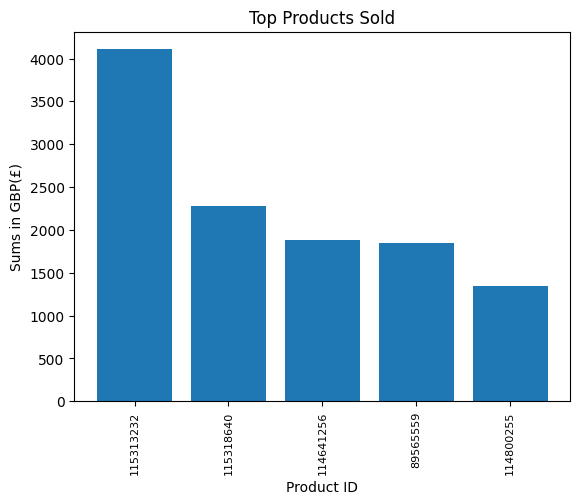

In [411]:
plt.bar(top_selling_products_overall['product_id'],top_selling_products_overall['value_in_gbp'])
plt.xticks(top_selling_products_overall['product_id'], rotation='vertical', size=8)
plt.title('Top Products Sold')
plt.ylabel('Sums in GBP(£)')
plt.xlabel('Product ID')
plt.show()

In [335]:
# Display the top 5 best-selling products by region
top_selling_products_by_region.head()

,country,value_in_gbp
0,GB,2.849097e+06
1,US,1.744840e+06
2,AU,1.705758e+05
3,IT,1.268202e+05
4,RoW,1.183174e+05


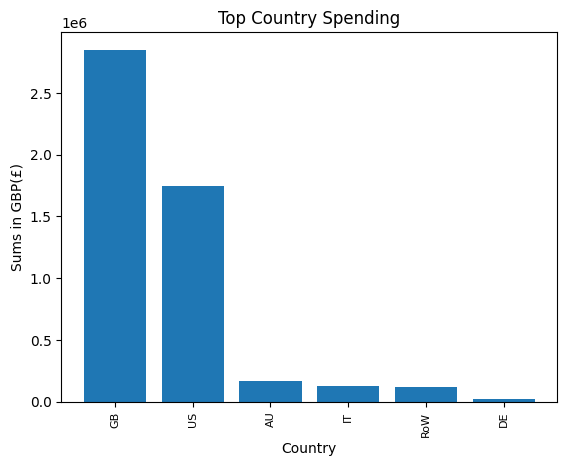

In [414]:
plt.bar(top_selling_products_by_region['country'],top_selling_products_by_region['value_in_gbp'])
plt.xticks(top_selling_products_by_region['country'], rotation='vertical', size=8)
plt.title('Top Country Spending')
plt.ylabel('Sums in GBP(£)')
plt.xlabel('Country')
plt.show()

In [337]:
# Display the top 5 best-selling products by department
top_selling_products_by_department.head()

,department,value_in_gbp
0,Womens apparel,1.872911e+06
1,Mens apparel,1.134214e+06
2,Shoes,9.462624e+05
3,Accessories,5.676576e+05
4,Jewellery,1.804566e+05


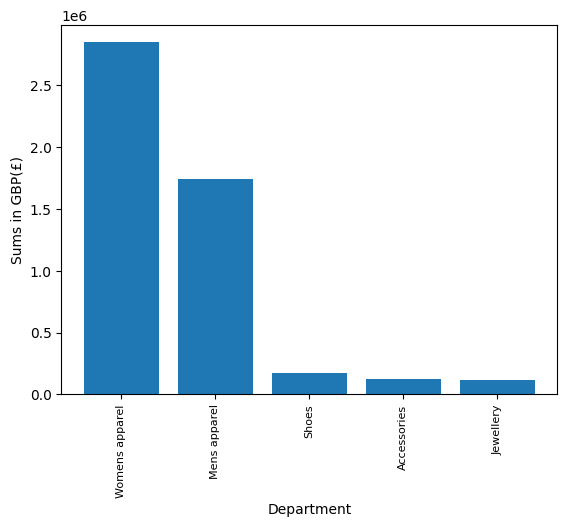

In [338]:
plt.bar(top_selling_products_by_department['department'],top_selling_products_by_region['value_in_gbp'])
plt.xticks(top_selling_products_by_department['department'], rotation='vertical', size=8)
plt.ylabel('Sums in GBP(£)')
plt.xlabel('Department')
plt.show()

In [339]:
# Sales trends over time
# Convert purchase_date to datetime format
merged_data['purchase_date'] = pd.to_datetime(merged_data['purchase_date'], format='%d/%m/%Y')

# Group by month and year to analyze sales trends
sales_trends = merged_data.groupby(merged_data['purchase_date'].dt.to_period('M'))['value_in_gbp'].sum().reset_index()
sales_trends['purchase_date'] = sales_trends['purchase_date'].dt.to_timestamp()

# Customer segmentation by demographics
# Total sales by age group
sales_by_age_group = merged_data.groupby('age_group')['value_in_gbp'].sum().reset_index()

# Total sales by gender
sales_by_gender = merged_data.groupby('gender')['value_in_gbp'].sum().reset_index()

# Total sales by membership length
sales_by_membership_length = merged_data.groupby('membership_length')['value_in_gbp'].sum().reset_index()

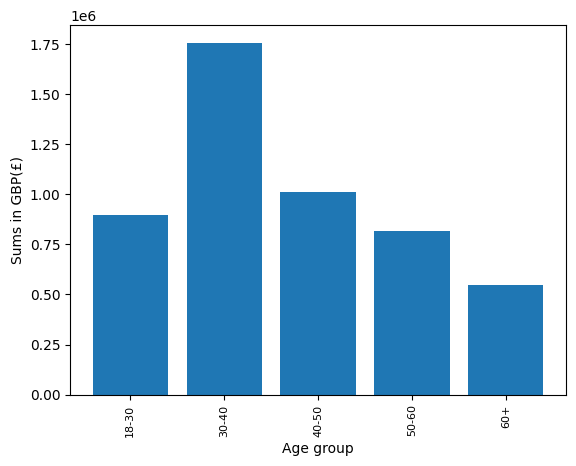

In [341]:
plt.bar(sales_by_age_group['age_group'],sales_by_age_group['value_in_gbp'])
plt.xticks(sales_by_age_group['age_group'], rotation='vertical', size=8)
plt.ylabel('Sums in GBP(£)')
plt.xlabel('Age group')
plt.show()

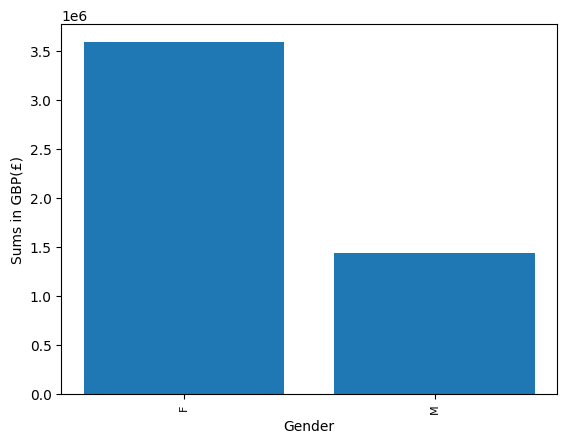

In [342]:
plt.bar(sales_by_gender['gender'],sales_by_gender['value_in_gbp'])
plt.xticks(sales_by_gender['gender'], rotation='vertical', size=8)
plt.ylabel('Sums in GBP(£)')
plt.xlabel('Gender')
plt.show()

In [343]:
# Total sales by membership length
top5_sales_by_membership_length = sales_by_membership_length.sort_values(by='value_in_gbp',ascending=False).head(5)

In [344]:
top5_sales_by_membership_length['membership_length'] = top5_sales_by_membership_length['membership_length'].astype('str')

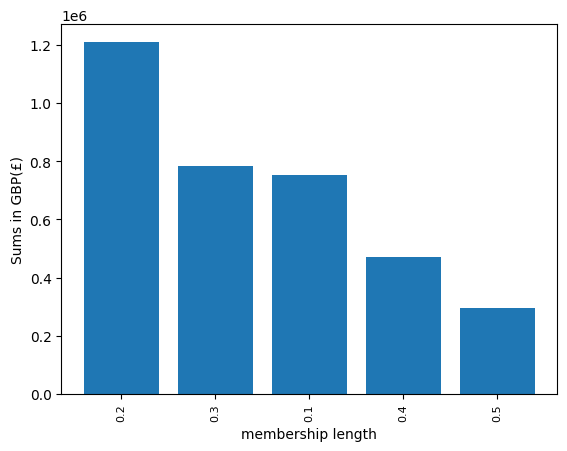

In [345]:
plt.bar(top5_sales_by_membership_length['membership_length'],top5_sales_by_membership_length['value_in_gbp'])
plt.xticks(top5_sales_by_membership_length['membership_length'], rotation='vertical', size=8)
plt.ylabel('Sums in GBP(£)')
plt.xlabel('membership length')
plt.show()

In [421]:
length_corr=sales_by_membership_length.corr()
print(length_corr)


                   membership_length  value_in_gbp
membership_length           1.000000     -0.398834
value_in_gbp               -0.398834      1.000000


In [406]:
# Total sales by membership length
sales_by_day = merged_data.groupby('purchase_date')['value_in_gbp'].sum()

In [407]:
sales_by_day = pd.DataFrame(sales_by_day)

In [409]:
# Create a new DataFrame with the day of the week
sales_by_day_df = sales_by_day.reset_index()
sales_by_day_df['day_of_week'] = sales_by_day_df['purchase_date'].dt.day_name()

# Set the index back to purchase_date to keep the timeline order intact
sales_by_day_df.set_index('purchase_date', inplace=True)

# Display the DataFrame
print(sales_by_day_df)

                value_in_gbp day_of_week
purchase_date                           
2019-08-01     776843.947473    Thursday
2019-08-02     730231.081539      Friday
2019-08-03     600884.802614    Saturday
2019-08-04     669615.279024      Sunday
2019-08-05     755478.089103      Monday
2019-08-06     764784.532743     Tuesday
2019-08-07     733121.192365   Wednesday


In [403]:
sales_by_day

,value_in_gbp
purchase_date,
2019-08-01,776843.947473
2019-08-02,730231.081539
2019-08-03,600884.802614
2019-08-04,669615.279024
2019-08-05,755478.089103
2019-08-06,764784.532743
2019-08-07,733121.192365


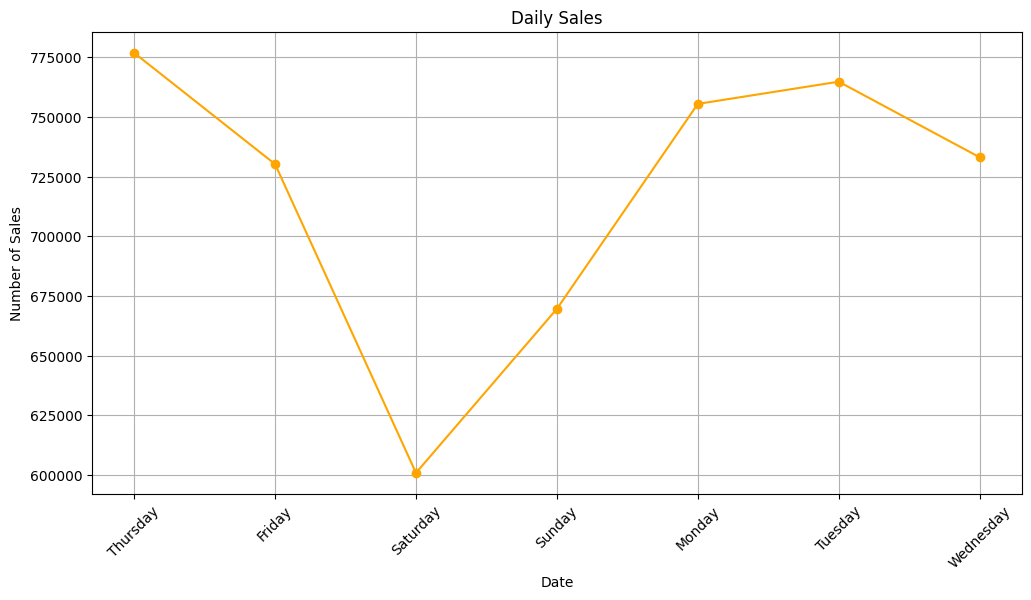

In [423]:
# Plot daily sales with day of the week as labels
plt.figure(figsize=(12, 6))
plt.plot(sales_by_day_df.index, sales_by_day_df['value_in_gbp'], marker='o', color='orange')
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.xticks(ticks=sales_by_day_df.index, labels=sales_by_day_df['day_of_week'], rotation=45)
plt.grid(True)
plt.show()

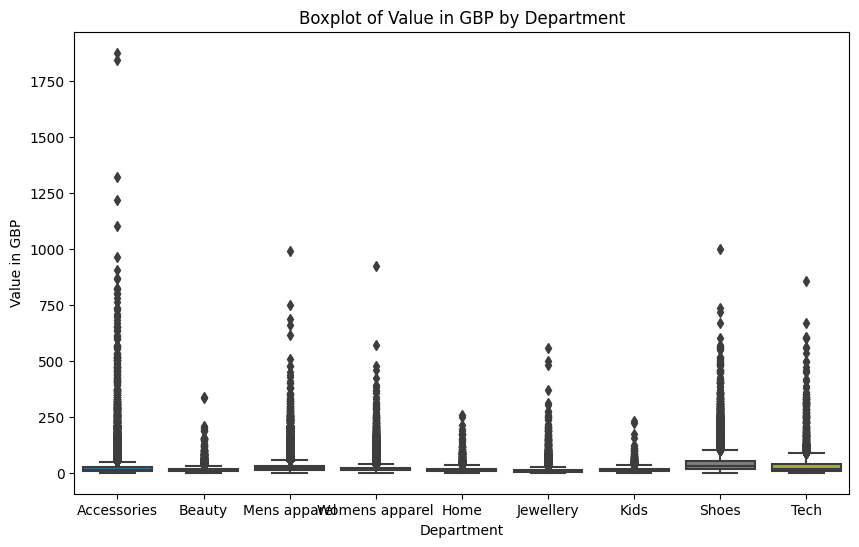

In [503]:

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='value_in_gbp', data=merged_data)
plt.title('Boxplot of Value in GBP by Department')
plt.xlabel('Department')
plt.ylabel('Value in GBP')
plt.show()

In [46]:
# Identify top-selling products by region
dfregion = best_selling_products.groupby(['country','department'])['value_in_gbp'].sum().sort_values(ascending=False).reset_index()

In [47]:
# Pivot the data
pivot_df = dfregion.pivot(index='country', columns='department', values='value_in_gbp')

# Fill NaN values with 0 (optional)
pivot_df = pivot_df.fillna(0)

# Display the pivoted dataframe
pivot_df.head()

department,Accessories,Beauty,Home,Jewellery,Kids,Mens apparel,Shoes,Tech,Womens apparel
country,,,,,,,,,
AU,15130.170010,0.0,0.00,7068.235239,0.00,25248.630000,28244.200,0.000,9.454742e+04
DE,2684.920833,0.0,0.00,599.919722,0.00,6874.691667,4235.965,0.000,5.298340e+03
FR,30.000000,0.0,0.00,0.000000,0.00,184.750000,893.930,0.000,3.774100e+02
GB,301587.795367,92275.3,5974.62,72661.014677,25310.23,691450.316250,572533.805,82865.015,1.004838e+06
IT,49155.430000,0.0,0.00,10101.055714,2398.95,9496.025000,22865.945,0.000,3.238313e+04


In [60]:
# Create a boolean mask where the values are zero
zero_mask = pivot_df != 0

# Display the boolean mask
print(zero_mask.head())

department  Accessories  Beauty   Home  Jewellery   Kids  Mens apparel  Shoes  \
country                                                                         
AU                 True   False  False       True  False          True   True   
DE                 True   False  False       True  False          True   True   
FR                 True   False  False      False  False          True   True   
GB                 True    True   True       True   True          True   True   
IT                 True   False  False       True   True          True   True   

department   Tech  Womens apparel  
country                            
AU          False            True  
DE          False            True  
FR          False            True  
GB           True            True  
IT          False            True  


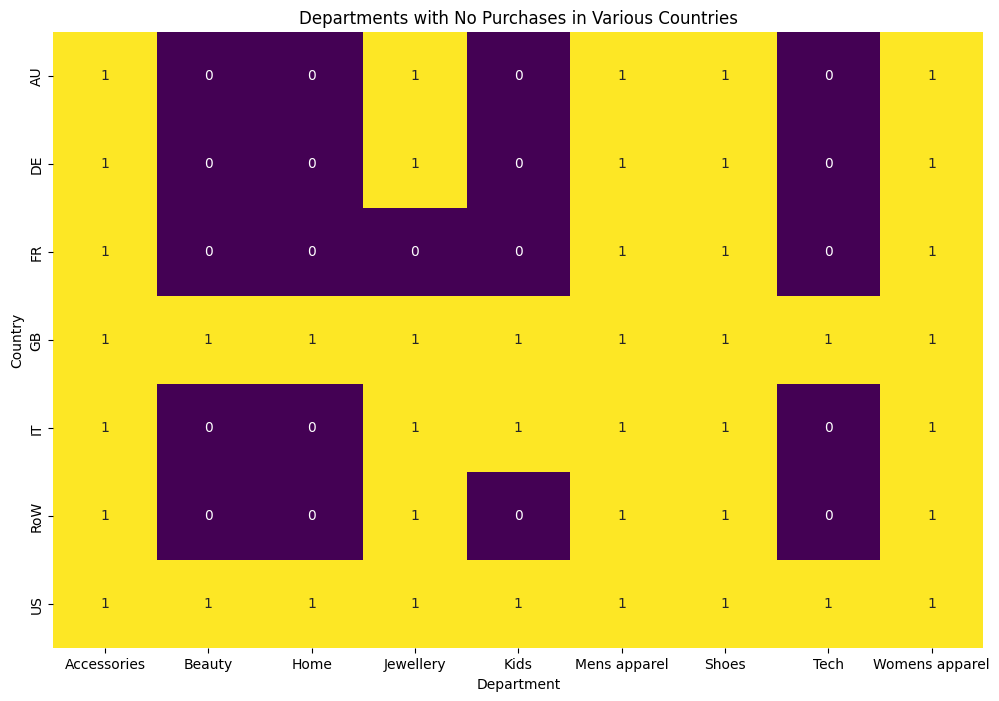

In [61]:
# Create a heatmap for missing values
plt.figure(figsize=(12, 8))
sns.heatmap(zero_mask, annot=True, cbar=False, cmap='viridis')
plt.title('Departments with No Purchases in Various Countries')
plt.xlabel('Department')
plt.ylabel('Country')
plt.show()

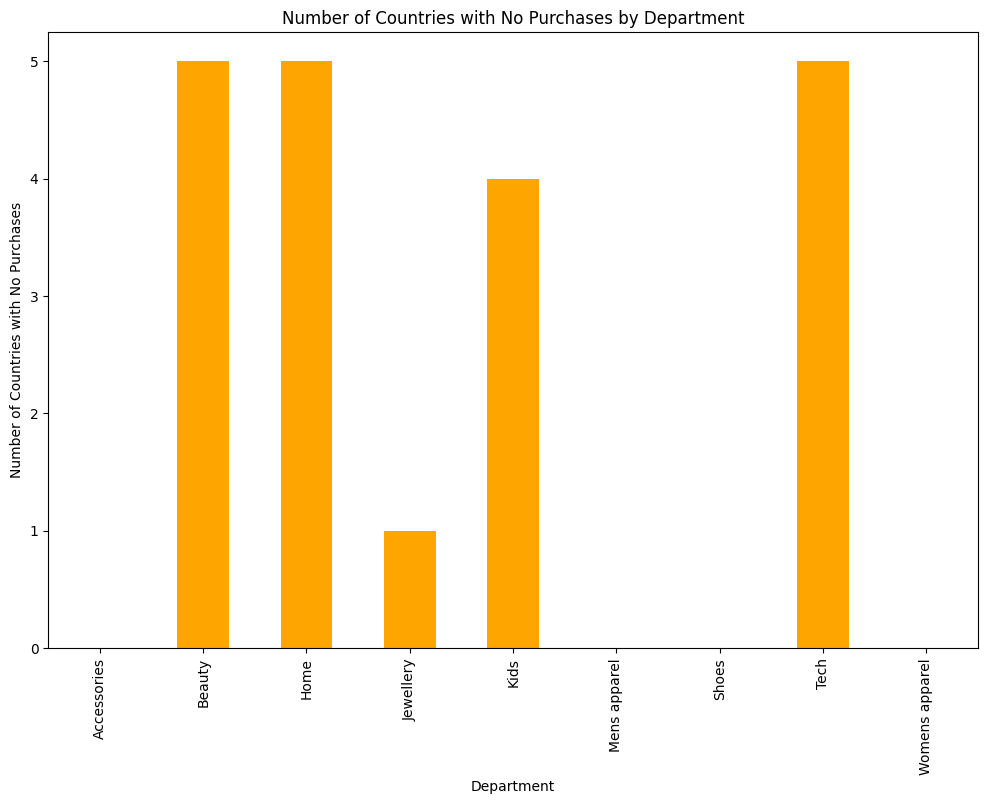

In [59]:
# Count the number of countries with zero purchases for each department
zero_counts = zero_mask.sum(axis=0)

# Create a bar chart
plt.figure(figsize=(12, 8))
zero_counts.plot(kind='bar', color='orange')
plt.title('Number of Countries with No Purchases by Department')
plt.xlabel('Department')
plt.ylabel('Number of Countries with No Purchases')
plt.show()

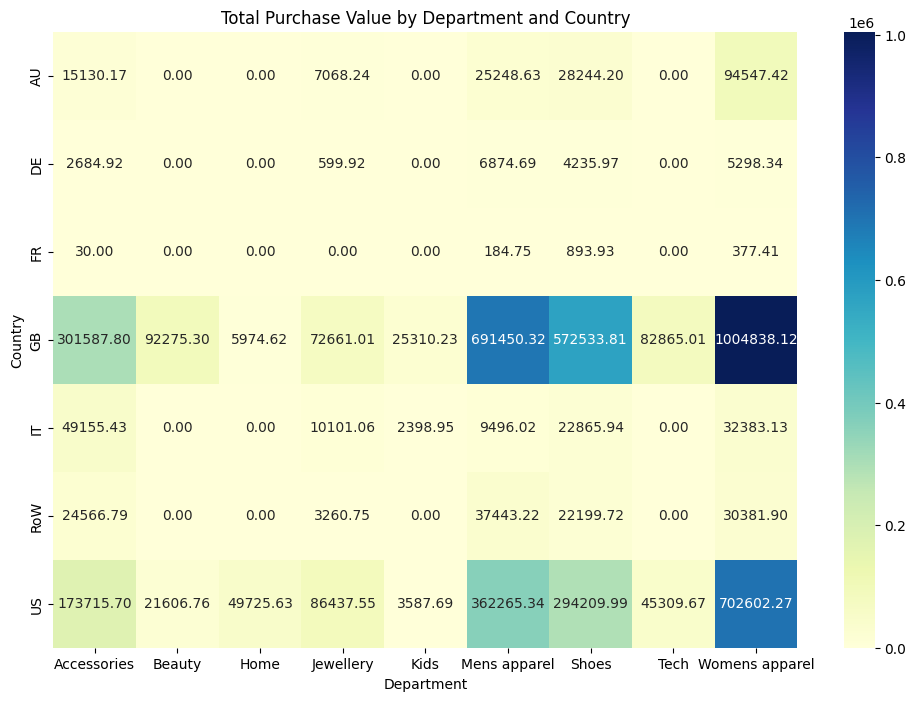

In [41]:
# Create a heatmap for purchase values
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Total Purchase Value by Department and Country')
plt.xlabel('Department')
plt.ylabel('Country')
plt.show()

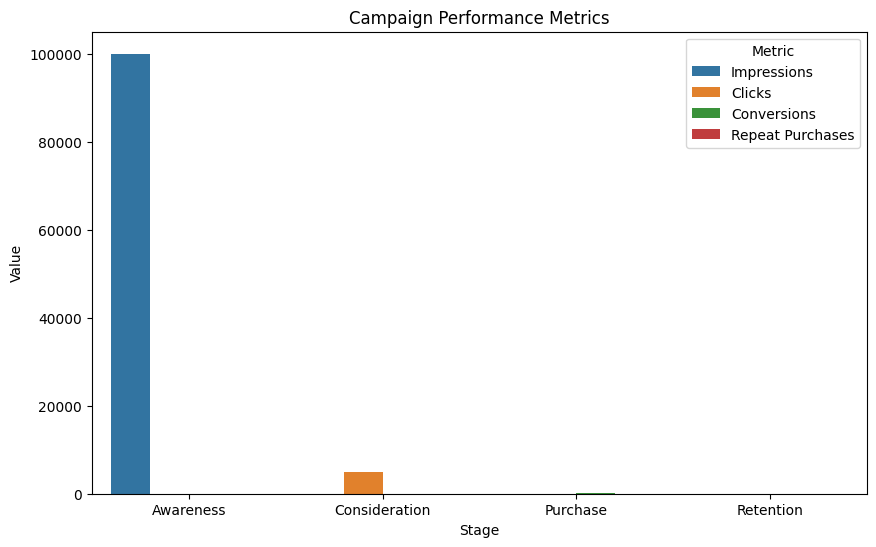

In [43]:
# Sample campaign data
campaign_data = pd.DataFrame({
    'Stage': ['Awareness', 'Consideration', 'Purchase', 'Retention'],
    'Metric': ['Impressions', 'Clicks', 'Conversions', 'Repeat Purchases'],
    'Value': [100000, 5000, 200, 50]
})

# Plot campaign performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Stage', y='Value', hue='Metric', data=campaign_data)
plt.title('Campaign Performance Metrics')
plt.xlabel('Stage')
plt.ylabel('Value')
plt.show()